Hello again, I hope that you are not tired because I am

# Tutorial 2: Data analysis and classification

## Introduction

In this tutorial you will:
-  How to analyze data
-  hot to classify data
## Let's get started!

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

First, let us retrieve the data from the previous tutorial

In [3]:
%store -r X_imp
%store -r y
%store -r data_imp

In [4]:
print(X_imp.shape)
print(data_imp.shape)

print(y)

(3500958, 7)
(3500958, 8)
[1 0 0 ... 0 0 1]


since we can visualize all the data, we randomly select 5000 samples

In [6]:
import numpy as np
chosen_idx = np.random.choice(3500958 , replace=False, size=5000) # this line migh be a probem, because we need to stratify
X_sample = X_imp.iloc[chosen_idx]
data_sample = data_imp.iloc[chosen_idx]


In [7]:
print(X_sample.shape)
print(data_sample.shape)

(5000, 7)
(5000, 8)


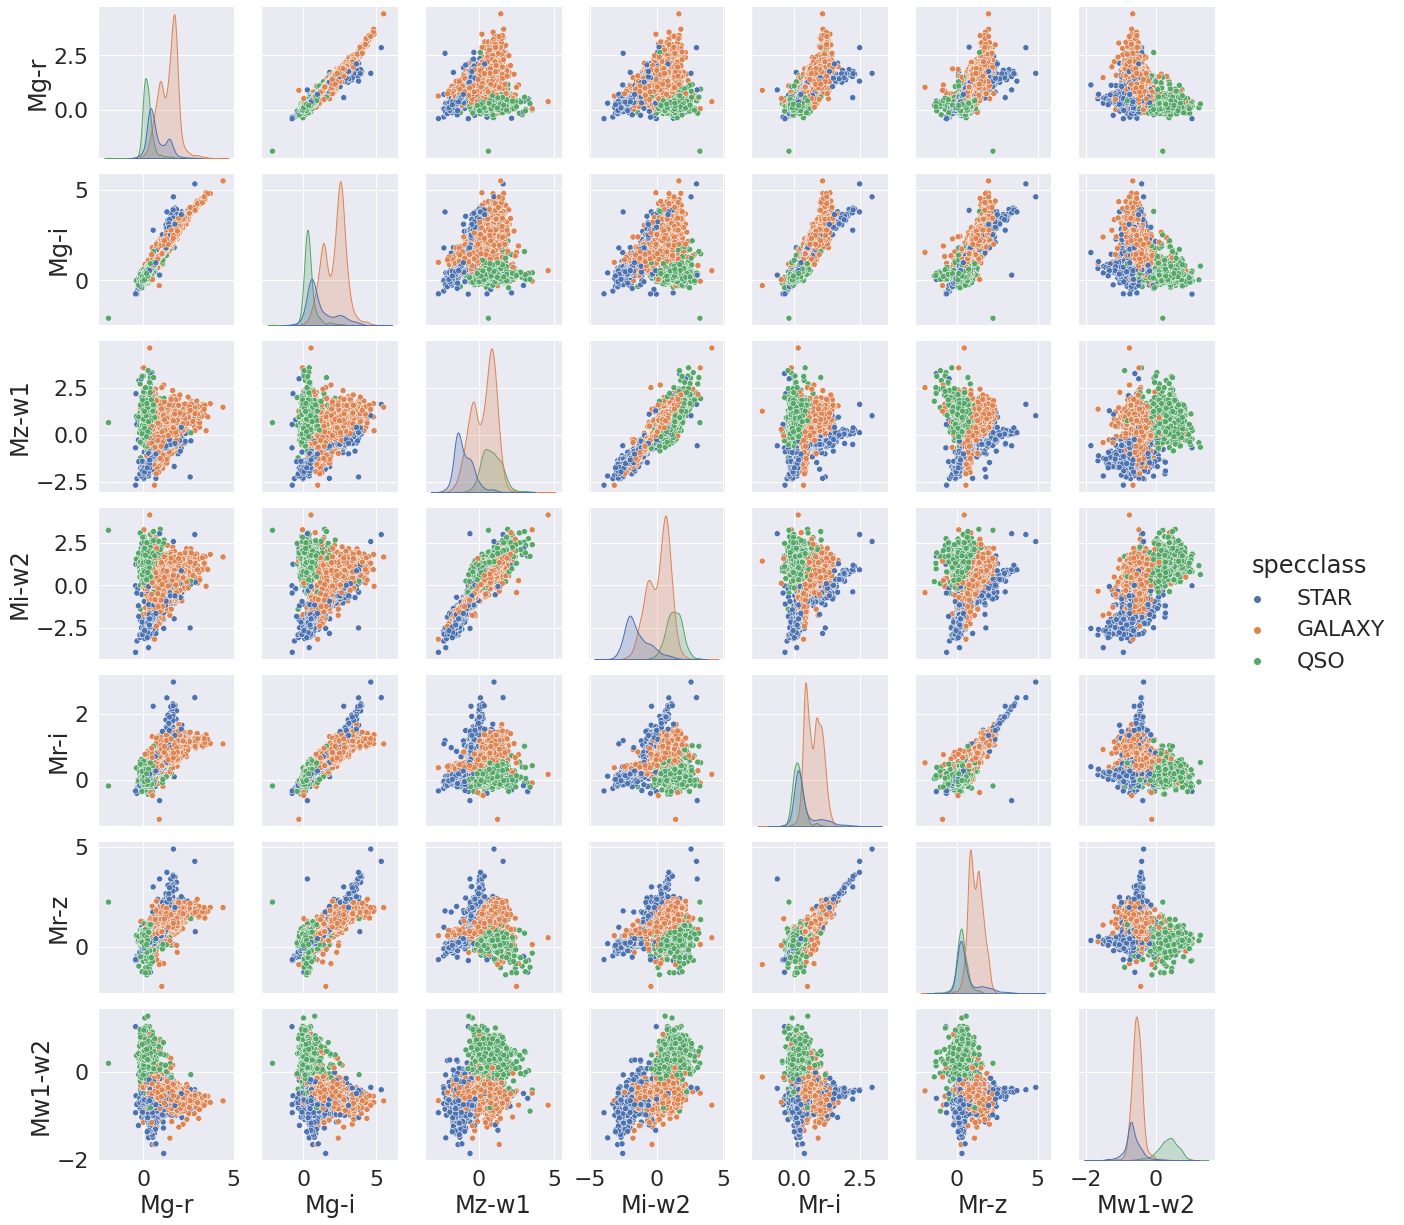

In [8]:
import seaborn as sns
sns.set(font_scale=2)
sns.pairplot(data_sample, hue="specclass")

## Classification

The next section will just show how to make a classifier using random forest (RF) and logistic regression (LR), we should use the same split that was used in the previous tutorial.

In [9]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split( X_imp, y, test_size = 0.4, random_state=3, stratify=y) # train and valid sets


In [10]:
print(Xtrain.shape)
print(Xtest.shape)

(2100574, 7)
(1400384, 7)


In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *


### RF

In [12]:
model = RandomForestClassifier(n_jobs = -1)
model.fit(Xtrain, Ytrain) 
predictions = model.predict(Xtest)
print("Classification")
print(classification_report(Ytest,predictions))
print("Matrix")
print(confusion_matrix(Ytest,predictions))
accuracy = accuracy_score(Ytest, predictions)
print()
print(accuracy)

Classification
              precision    recall  f1-score   support

           0       0.97      0.98      0.97    858209
           1       0.96      0.96      0.96    275974
           2       0.96      0.93      0.95    266201

    accuracy                           0.97   1400384
   macro avg       0.96      0.96      0.96   1400384
weighted avg       0.97      0.97      0.97   1400384

Matrix
[[840030   8785   9394]
 [ 10938 263747   1289]
 [ 15286   2501 248414]]

0.9655858678762397


### LR

In [13]:
model = LogisticRegression(n_jobs = -1)
model.fit(Xtrain, Ytrain) 
predictions = model.predict(Xtest)
print("Classification")
print(classification_report(Ytest,predictions))
print("Matrix")
print(confusion_matrix(Ytest,predictions))
accuracy = accuracy_score(Ytest, predictions)
print()

Classification
              precision    recall  f1-score   support

           0       0.89      0.93      0.91    858209
           1       0.94      0.94      0.94    275974
           2       0.79      0.69      0.74    266201

    accuracy                           0.89   1400384
   macro avg       0.88      0.85      0.86   1400384
weighted avg       0.88      0.89      0.88   1400384

Matrix
[[797456  11868  48885]
 [ 16116 259633    225]
 [ 79375   3584 183242]]



### Now the Question should we balance the data, by downsampling. ? ?  ? ? ?  ? ? ? ? ? ? ? ? ? ? ? 
- since the training is taking some time we will have to downsample
- Downsample will help in avoiding overfitting aginst the majority class

let us just try it, shall we
 - #@ we are only doing downsampling on the trainig data. 

In [15]:
Xtrain['y_tr'] = Ytrain # comine the features with the target so we can downsample easier.
train = Xtrain
print(train.head(2))

             Mg-r      Mg-i     Mz-w1     Mi-w2      Mr-i      Mr-z  Mw1-w2  \
318477   0.181311  0.210932  1.589010  1.858430  0.029621  0.127041   0.172   
2541929  0.601665  0.826199 -1.265843 -2.378995  0.224533  0.362381  -1.251   

         y_tr  
318477      1  
2541929     2  


/anaconda3/lib/python3.6/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [16]:
stars_tr = train[train["y_tr"] == 2]
galaxies_tr  = train[train["y_tr"] == 0]
qsr_tr = train[train["y_tr"] == 1]

In [17]:
print(stars_tr.shape)
print(galaxies_tr.shape)
print(qsr_tr.shape)

(399302, 8)
(1287312, 8)
(413960, 8)


In [18]:
from sklearn.utils import resample
galaxies_downsample = resample(galaxies_tr,
             replace=True,
             n_samples=len(stars_tr),
             random_state=42)

print(galaxies_downsample.shape)

qsrs_downsample = resample(qsr_tr,
             replace=True,
             n_samples=len(stars_tr),
             random_state=42)

print(qsrs_downsample.shape)

(399302, 8)
(399302, 8)


now join every thing, then split the target from the features, then retrain. 

In [19]:
trainArr = [stars_tr, galaxies_downsample, qsrs_downsample]
train = pd.concat(trainArr, ignore_index=True)

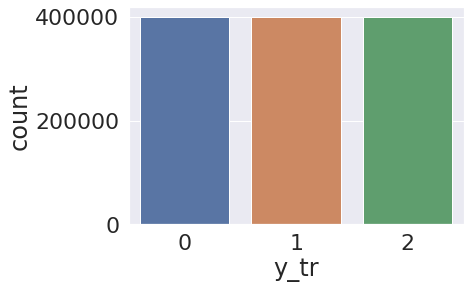

In [20]:
ax = sns.countplot(x="y_tr",data=train)


In [21]:
from sklearn.utils import shuffle
train = shuffle(train, random_state=20) # we have to shuffle the data, to avoid overfitting
yTrain = train[["y_tr"]]
xTrain = train.drop(['y_tr'], axis = 1)


In [22]:
print(yTrain.head(10))
# print(xTrain.head(2))

         y_tr
1150977     1
925186      1
910953      1
517496      0
423847      0
93938       2
152260      2
612299      0
124761      2
84217       2


In [23]:
print(xTrain.shape)
print(yTrain.shape)
print(399302*3)

(1197906, 7)
(1197906, 1)
1197906


### RF on the balanced data

In [24]:
model = RandomForestClassifier(n_jobs = -1)
model.fit(xTrain, np.array(yTrain).flatten()) 
predictions = model.predict(Xtest)
print("Classification")
print(classification_report(Ytest,predictions))
print("Matrix")
print(confusion_matrix(Ytest,predictions))
accuracy = accuracy_score(Ytest, predictions)
print()
print(accuracy)

Classification
              precision    recall  f1-score   support

           0       0.98      0.96      0.97    858209
           1       0.94      0.97      0.95    275974
           2       0.91      0.96      0.93    266201

    accuracy                           0.96   1400384
   macro avg       0.94      0.96      0.95   1400384
weighted avg       0.96      0.96      0.96   1400384

Matrix
[[821381  14442  22386]
 [  6932 266872   2170]
 [  8525   2558 255118]]

0.9592875954024039


### LR on the balanced data

In [25]:
model = LogisticRegression(n_jobs = -1)
model.fit(xTrain, np.array(yTrain).flatten()) 
predictions = model.predict(Xtest)
print("Classification")
print(classification_report(Ytest,predictions))
print("Matrix")
print(confusion_matrix(Ytest,predictions))
accuracy = accuracy_score(Ytest, predictions)
print()

Classification
              precision    recall  f1-score   support

           0       0.95      0.81      0.87    858209
           1       0.91      0.96      0.94    275974
           2       0.61      0.88      0.72    266201

    accuracy                           0.85   1400384
   macro avg       0.82      0.88      0.84   1400384
weighted avg       0.88      0.85      0.86   1400384

Matrix
[[692511  20479 145219]
 [ 10633 264672    669]
 [ 28492   4741 232968]]



### Exercise 
- Try the work above with different features, and different models. and report the difference in the accuracy.